<a href="https://colab.research.google.com/github/gromdimon/Training--Projects/blob/main/Cancer_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and downloading dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://github.com/gromdimon/Files/raw/main/number-of-cancer-surgeries-volume-performed-in-california-hospitals.csv'
df = pd.read_csv(path, encoding='cp1252')

In [20]:
# Additional feature
# Adding mean value to NaNs
path = 'https://github.com/gromdimon/Files/raw/main/number-of-cancer-surgeries-volume-performed-in-california-hospitals.csv'
df_1 = pd.read_csv(path, encoding='cp1252')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
selection = ['# of Cases (ICD 10)', '# of Cases (ICD 9)']
df_1[selection] = imputer.fit_transform(df_1[selection])
df_1.tail(3)

In [29]:
# Additional feature
# Using KNN algorithm to form mean value only from relevant values
path = 'https://github.com/gromdimon/Files/raw/main/number-of-cancer-surgeries-volume-performed-in-california-hospitals.csv'
df_2 = pd.read_csv(path, encoding='cp1252')
from sklearn.impute import KNNImputer
imputer = KNNImputer()
selection = ['# of Cases (ICD 10)', '# of Cases (ICD 9)', 'OSHPDID', 'LATITUDE', 'LONGITUDE']
df_2[selection] = imputer.fit_transform(df_2[selection])
df_2.head(3)

,year,county,Hospital,OSHPDID,Surgery,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
0,2013,NaN,Statewide,106282885.0,COLON,7128.0,56.127708,34.567512,-118.959694
1,2013,NaN,Statewide,106282885.0,BLADDER,892.0,56.127708,34.567512,-118.959694
2,2013,NaN,Statewide,106282885.0,RECTUM,2128.0,56.127708,34.567512,-118.959694


# First look at data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11821 entries, 0 to 11820
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 11821 non-null  int64  
 1   county               11755 non-null  object 
 2   Hospital             11821 non-null  object 
 3   OSHPDID              11755 non-null  float64
 4   Surgery              11821 non-null  object 
 5   # of Cases (ICD 9)   5729 non-null   float64
 6   # of Cases (ICD 10)  6092 non-null   float64
 7   LATITUDE             11748 non-null  float64
 8   LONGITUDE            11748 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 831.3+ KB


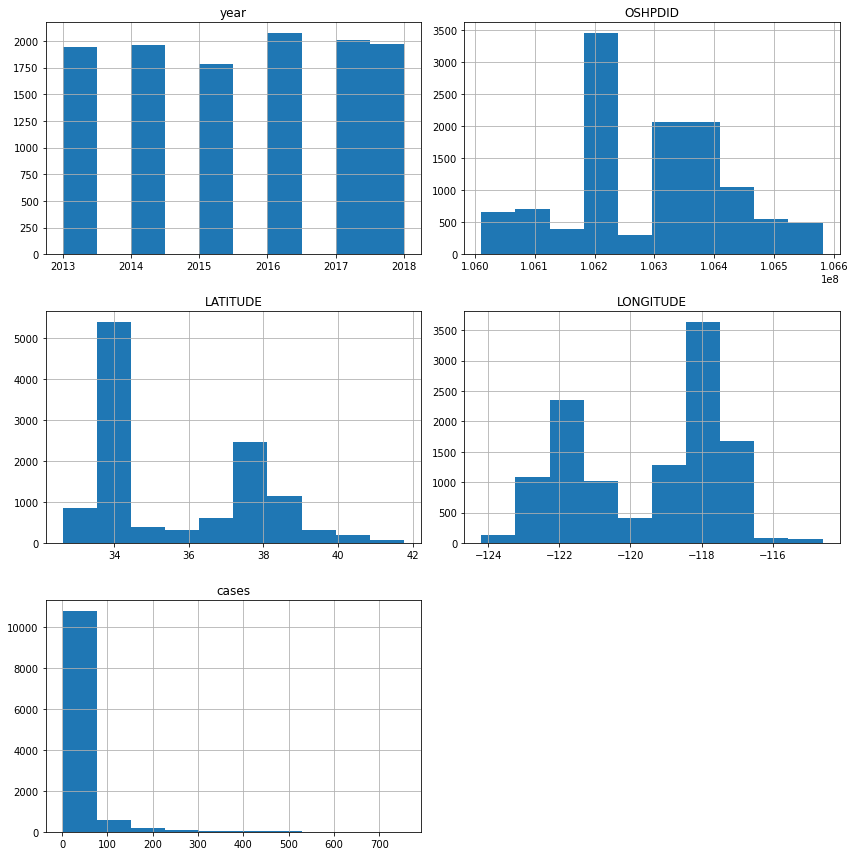

In [30]:
df.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

In [6]:
df.describe()

,year,OSHPDID,# of Cases (ICD 9),# of Cases (ICD 10),LATITUDE,LONGITUDE
count,11821.000000,1.175500e+04,5729.000000,6092.000000,11748.000000,11748.000000
mean,2015.523983,1.062823e+08,49.448769,56.127708,35.630675,-119.552318
std,1.709742,1.347787e+05,590.833097,680.657920,2.135230,2.020634
min,2013.000000,1.060107e+08,1.000000,1.000000,32.619090,-124.195140
25%,2014.000000,1.061904e+08,2.000000,2.000000,33.949170,-121.776854
50%,2016.000000,1.063013e+08,8.000000,8.000000,34.274589,-118.486230
75%,2017.000000,1.063713e+08,24.000000,27.000000,37.747990,-117.955240
max,2018.000000,1.065810e+08,25829.000000,29349.000000,41.772780,-114.595600


# Managing null values & duplicates

In [7]:
def check_missing_values_and_duplicates(dataframe):
    if dataframe.isnull().sum().sum() > 0 or dataframe.isnull().sum().sum() > 0:
        m_total = dataframe.isnull().sum().sort_values(ascending=False)
        total = m_total[m_total > 0]

        m_percent = dataframe.isnull().mean().sort_values(ascending=False)
        percent = m_percent[m_percent > 0]

        m_duplicates = dataframe.duplicated().sort_values(ascending=False)
        duplicates = m_duplicates[m_duplicates > 0]

        missing_data = pd.concat([total, percent, duplicates], axis=1, keys=['Total', 'Percent', 'Duplicates'])

        print(f'Total and Percentage of NaN & Duplicates:\n {missing_data}')
    else:
        print('No NaN or Duplicate found.')

In [8]:
check_missing_values_and_duplicates(df)

Total and Percentage of NaN & Duplicates:
                      Total   Percent Duplicates
# of Cases (ICD 9)    6092  0.515354        NaN
# of Cases (ICD 10)   5729  0.484646        NaN
LONGITUDE               73  0.006175        NaN
LATITUDE                73  0.006175        NaN
OSHPDID                 66  0.005583        NaN
county                  66  0.005583        NaN


In [9]:
# Feature for making one column from two
def cases(row):
    if pd.isna(row['# of Cases (ICD 9)']):
      return row['# of Cases (ICD 10)']
    elif pd.isna(row['# of Cases (ICD 10)']):
      return row['# of Cases (ICD 9)']

In [10]:
df['cases'] = df.apply(lambda row: cases(row), axis=1)
df.drop(columns=['# of Cases (ICD 9)', '# of Cases (ICD 10)'], inplace=True)
df.head(3)

,year,county,Hospital,OSHPDID,Surgery,LATITUDE,LONGITUDE,cases
0,2013,NaN,Statewide,NaN,COLON,NaN,NaN,7128.0
1,2013,NaN,Statewide,NaN,BLADDER,NaN,NaN,892.0
2,2013,NaN,Statewide,NaN,RECTUM,NaN,NaN,2128.0


In [11]:
check_missing_values_and_duplicates(df)

Total and Percentage of NaN & Duplicates:
            Total   Percent Duplicates
LONGITUDE     73  0.006175        NaN
LATITUDE      73  0.006175        NaN
OSHPDID       66  0.005583        NaN
county        66  0.005583        NaN


In [12]:
df.dropna(inplace=True)

In [13]:
check_missing_values_and_duplicates(df)

No NaN or Duplicate found.


# Managing outliers

## Visualising datafame to detect the outliers

In [86]:
selection = ['year', 'OSHPDID', 'LONGITUDE', 'cases']
df_visual = df[selection]

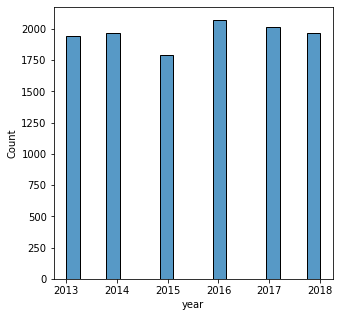

In [31]:
plt.figure(figsize=(5,5))
sns.histplot(data=df_visual['year'])
plt.show()

<Figure size 360x360 with 0 Axes>

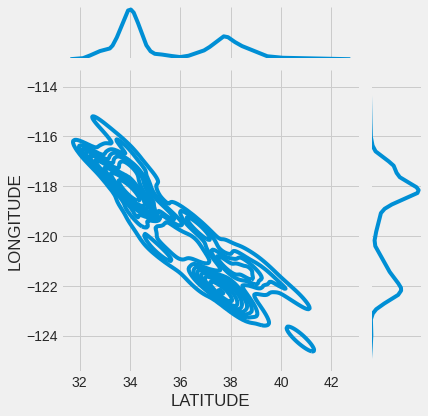

In [41]:
plt.figure(figsize=(5,5))
plt.style.use('fast')
sns.jointplot(x=df_visual['LATITUDE'], y=df_visual['LONGITUDE'], kind='kde')
plt.show()

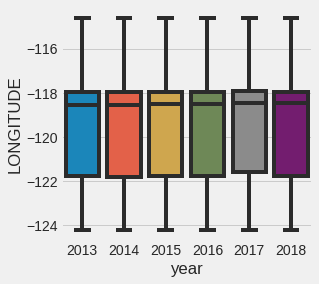

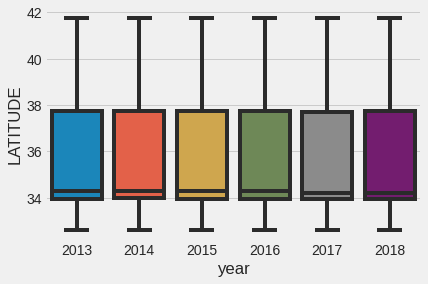

In [75]:
plt.figure(figsize=(4,4))
sns.boxplot(x=df['year'], y=df['LONGITUDE'])
plt.show()
sns.boxplot(x=df['year'], y=df['LATITUDE'])
plt.show()

In [89]:
df_labels = list(df_visual.columns)
i = plt.figure(figsize=(15,30)) 
for var in df_labels: #plotting boxplot for each variable
   plt.subplot(round(len(df_labels),0)/3+3,4,i)
   plt.boxplot(df_visual[var],whis=5)
   plt.title(var)
   i+=plt.tight_layout()
plt.show()

TypeError: ignored

<Figure size 1080x2160 with 0 Axes>

## Finding anomaliese using prediction models

In [53]:
# Anomaly detection using IsolationForest 
selection = ['year', 'OSHPDID', 'LONGITUDE', 'cases']
df1 = df[selection]
from sklearn.ensemble import IsolationForest
identifier = IsolationForest().fit(df1)
sum = 0
for i in identifier.predict(df1):
  if i > 0:
    sum+=1
print(sum)

7968


In [54]:
# Anomaly detection using SVM
selection = ['year', 'OSHPDID', 'LONGITUDE', 'cases']
df1 = df[selection]
from sklearn.svm import OneClassSVM
identifier_1 = OneClassSVM().fit(df1)
sum = 0
for i in identifier_1.predict(df1):
  if i > 0:
    sum+=1
print(sum)

5656


In [58]:
# Anomaly detection using KNN method
selection = ['year', 'OSHPDID', 'LONGITUDE', 'cases']
df1 = df[selection]
from sklearn.neighbors import LocalOutlierFactor
model = LocalOutlierFactor(novelty=True).fit(df1)
sum = 0
for i in model.predict(df1):
  if i > 0:
    sum+=1
print(sum)

9982


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


# Applying features to columns

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11748 entries, 11 to 11820
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       11748 non-null  int64  
 1   county     11748 non-null  object 
 2   Hospital   11748 non-null  object 
 3   OSHPDID    11748 non-null  float64
 4   Surgery    11748 non-null  object 
 5   LATITUDE   11748 non-null  float64
 6   LONGITUDE  11748 non-null  float64
 7   cases      11748 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [69]:
df['county'].value_counts()

Los Angeles        3287
Orange              871
San Diego           757
Riverside           609
San Bernardino      535
Alameda             507
Santa Clara         482
Sacramento          410
San Francisco       375
Contra Costa        296
San Mateo           278
Ventura             276
Kern                260
San Joaquin         253
Fresno              235
Stanislaus          171
Solano              157
Sonoma              154
San Luis Obispo     149
Placer              141
Monterey            136
Santa Barbara       135
Butte               120
Humboldt             99
Marin                96
Tulare               90
Napa                 86
Shasta               84
Santa Cruz           74
El Dorado            58
Imperial             54
Yolo                 52
Yuba                 49
Nevada               48
Mendocino            47
Kings                41
Merced               33
Siskiyou             31
Lake                 28
Tuolumne             23
Sutter               21
Madera          

In [70]:
df['Hospital'].value_counts()

Hoag Memorial Hospital Presbyterian                       66
Huntington Memorial Hospital                              66
Loma Linda University Medical Center                      66
Kaiser Foundation Hospital – San Diego                    66
Keck Hospital of University of Southern California        66
                                                          ..
Monrovia Medical Center                                    1
George L. Mee Memorial Hospital                            1
Promise Hospital of East Los Angeles – Suburban Campus     1
Anaheim General Hospital                                   1
Vibra Hospital of San Diego                                1
Name: Hospital, Length: 342, dtype: int64

In [71]:
df['Surgery'].value_counts()

COLON        884
BREAST       875
Colon        867
Breast       849
Rectum       771
RECTUM       707
Prostate     604
STOMACH      564
LUNG         561
Stomach      556
Lung         508
PROSTATE     490
Liver        483
BRAIN        417
Brain        413
Pancreas     388
Bladder      373
BLADDER      356
LIVER        309
PANCREAS     302
Esophagus    240
ESOPHAGUS    231
Name: Surgery, dtype: int64

In this dataframe there are too many values in object columns, that's why it only make sense to use dummies feature.

In [78]:
df_surgery = pd.get_dummies(df['Surgery'])
df_surgery

,BLADDER,BRAIN,BREAST,Bladder,Brain,Breast,COLON,Colon,ESOPHAGUS,Esophagus,LIVER,LUNG,Liver,Lung,PANCREAS,PROSTATE,Pancreas,Prostate,RECTUM,Rectum,STOMACH,Stomach
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11817,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
11818,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11819,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
df_1 = pd.concat([df, df_surgery], axis=1)
df_1.drop(columns='Surgery')
df_1.head(3)

,year,county,Hospital,OSHPDID,Surgery,LATITUDE,LONGITUDE,cases,BLADDER,BRAIN,BREAST,Bladder,Brain,Breast,COLON,Colon,ESOPHAGUS,Esophagus,LIVER,LUNG,Liver,Lung,PANCREAS,PROSTATE,Pancreas,Prostate,RECTUM,Rectum,STOMACH,Stomach
11,2013,Alameda,Alameda Hospital,106010735.0,STOMACH,37.762953,-122.25362,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,2013,Alameda,Alameda Hospital,106010735.0,COLON,37.762953,-122.25362,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,2013,Alameda,Alameda Hospital,106010735.0,BREAST,37.762953,-122.25362,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
# Applying lower_case_style
df_1.columns = [i.replace(' ', '_').lower() for i in df_1.columns] 
df_1.head(3)

,year,county,hospital,oshpdid,surgery,latitude,longitude,cases,bladder,brain,breast,bladder,brain,breast,colon,colon,esophagus,esophagus,liver,lung,liver,lung,pancreas,prostate,pancreas,prostate,rectum,rectum,stomach,stomach
11,2013,Alameda,Alameda Hospital,106010735.0,STOMACH,37.762953,-122.25362,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,2013,Alameda,Alameda Hospital,106010735.0,COLON,37.762953,-122.25362,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,2013,Alameda,Alameda Hospital,106010735.0,BREAST,37.762953,-122.25362,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
